#Week1 Python入門課題

##●栗まんじゅう問題

###【問題】栗まんじゅうが太陽系を覆う日
漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。

[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館.

「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。


ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。さまざまな議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。



1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。


栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。


ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

栗まんじゅう(0.000125m^3)が太陽系(1.413717e+49m^3)を満たすまでに掛かる時間: 885分
上記時間までの体積の時間推移


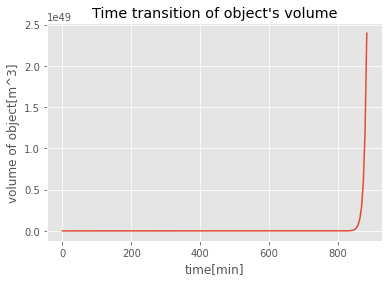

野球ボール(0.000212m^3)が東京ドーム(1240000m^3)を満たすまでに掛かる時間: 165分
上記時間までの体積の時間推移


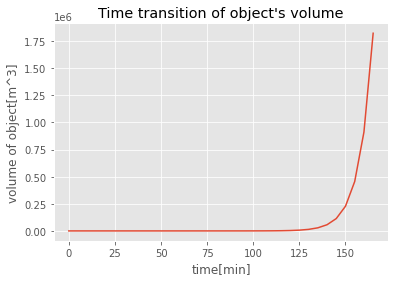

In [2]:
import numpy as np
import math

def compute_num_and_time_to_filled(arg_volume_object, arg_volume_space):
    '''
    #Description
        バイバインが振りかけられた物体が増殖し続け、その物体によって空間が満たされるまでに要する増殖の回数と時間を求める関数。

    #Parameters
        arg_volume_object:   バイバインが振りかけられる対象物の体積[m^3]
        arg_volume_space:    空間の体積[m^3]

    
    #Returns
        ret_time:            増殖した物体が空間を満たすまでの時間[min]
        ret_num:    空間を満たすまでに必要な増殖回数
    '''

    TIME_PER_INCREASE = 5     #1回の増殖に必要な時間[min]

    ret_num = math.ceil(np.log2(arg_volume_space / arg_volume_object))     #物体が空間を満たすまでに必要な増殖回数  (小数点以下切り上げ)
    ret_time = TIME_PER_INCREASE * ret_num

    return ret_num, ret_time


def draw_graph_of_volume(arg_increase_num, arg_volume_object):
    '''
    #Description
        与えられた回数だけ物体が増殖するまでの、物体の体積の時間推移をグラフ表示する関数。

    #Parameters
        arg_increase_num:    物体の分裂回数
        arg_volume_object:   対象物の体積[m^3]
    
    #Returns
        <none>
    '''

    TIME_PER_INCREASE = 5     #1回の増殖に必要な時間[min]


    list_volume = []    #増殖後の物体の体積のリスト
    temp_volume_object = arg_volume_object    #物体の体積 （初期値を代入）
    list_volume.append(arg_volume_object)

    for i in range(arg_increase_num):
      temp_volume_object *= 2
      list_volume.append(temp_volume_object)

    import matplotlib.pyplot as plt
    import matplotlib.style
    %matplotlib inline
    matplotlib.style.use('ggplot')
    # グラフを表示する。タイトルと軸ラベル名付き。
    fig, ax = plt.subplots()
    ax.set_title("Time transition of object's volume")
    ax.set_xlabel("time[min]")
    ax.set_ylabel("volume of object[m^3]")
    ax.plot(range(0,(arg_increase_num + 1)*TIME_PER_INCREASE, TIME_PER_INCREASE), list_volume)
    plt.show()

#栗まんじゅうが太陽系を覆うまでの時間と体積の時間推移
volume_object = 0.05**3                                 #栗まんじゅうの体積[m^3]   (補足)5cm角のまんじゅうと仮定。
volume_space = (4 / 3)* np.pi * 15000000000000000**3     #太陽系の体積   (補足)太陽系の半径＝15兆kmと仮定。(参考：https://again.lunaclear.com/knowledge/science/t58/)

num, time = compute_num_and_time_to_filled(volume_object, volume_space)
print("栗まんじゅう({:.6f}m^3)が太陽系({:10e}m^3)を満たすまでに掛かる時間: {}分".format(volume_object, volume_space, time))
print("上記時間までの体積の時間推移")
draw_graph_of_volume(num, volume_object)


#野球ボールが東京ドームを覆うまでの時間と体積の時間推移
volume_object = (4 / 3) * np.pi * (0.074/2)**3                #野球ボールの体積[m^3]   (補足)野球ボールの直径は74mmと仮定
volume_space = 1240000                                        #東京ドームの体積[m^3]   (補足)東京ドームの体積は124万m^3と仮定。(参考：https://www.tokyo-dome.co.jp/dome/about/)

num, time = compute_num_and_time_to_filled(volume_object, volume_space)
print("野球ボール({:.6f}m^3)が東京ドーム({}m^3)を満たすまでに掛かる時間: {}分".format(volume_object, volume_space, time))
print("上記時間までの体積の時間推移")
draw_graph_of_volume(num, volume_object)
